Starting data analysis pipeline...

1. Loading and merging datasets...

2. Cleaning and preprocessing data...

Processed data saved to 'processed_audible_data.csv'

3. Performing exploratory data analysis...


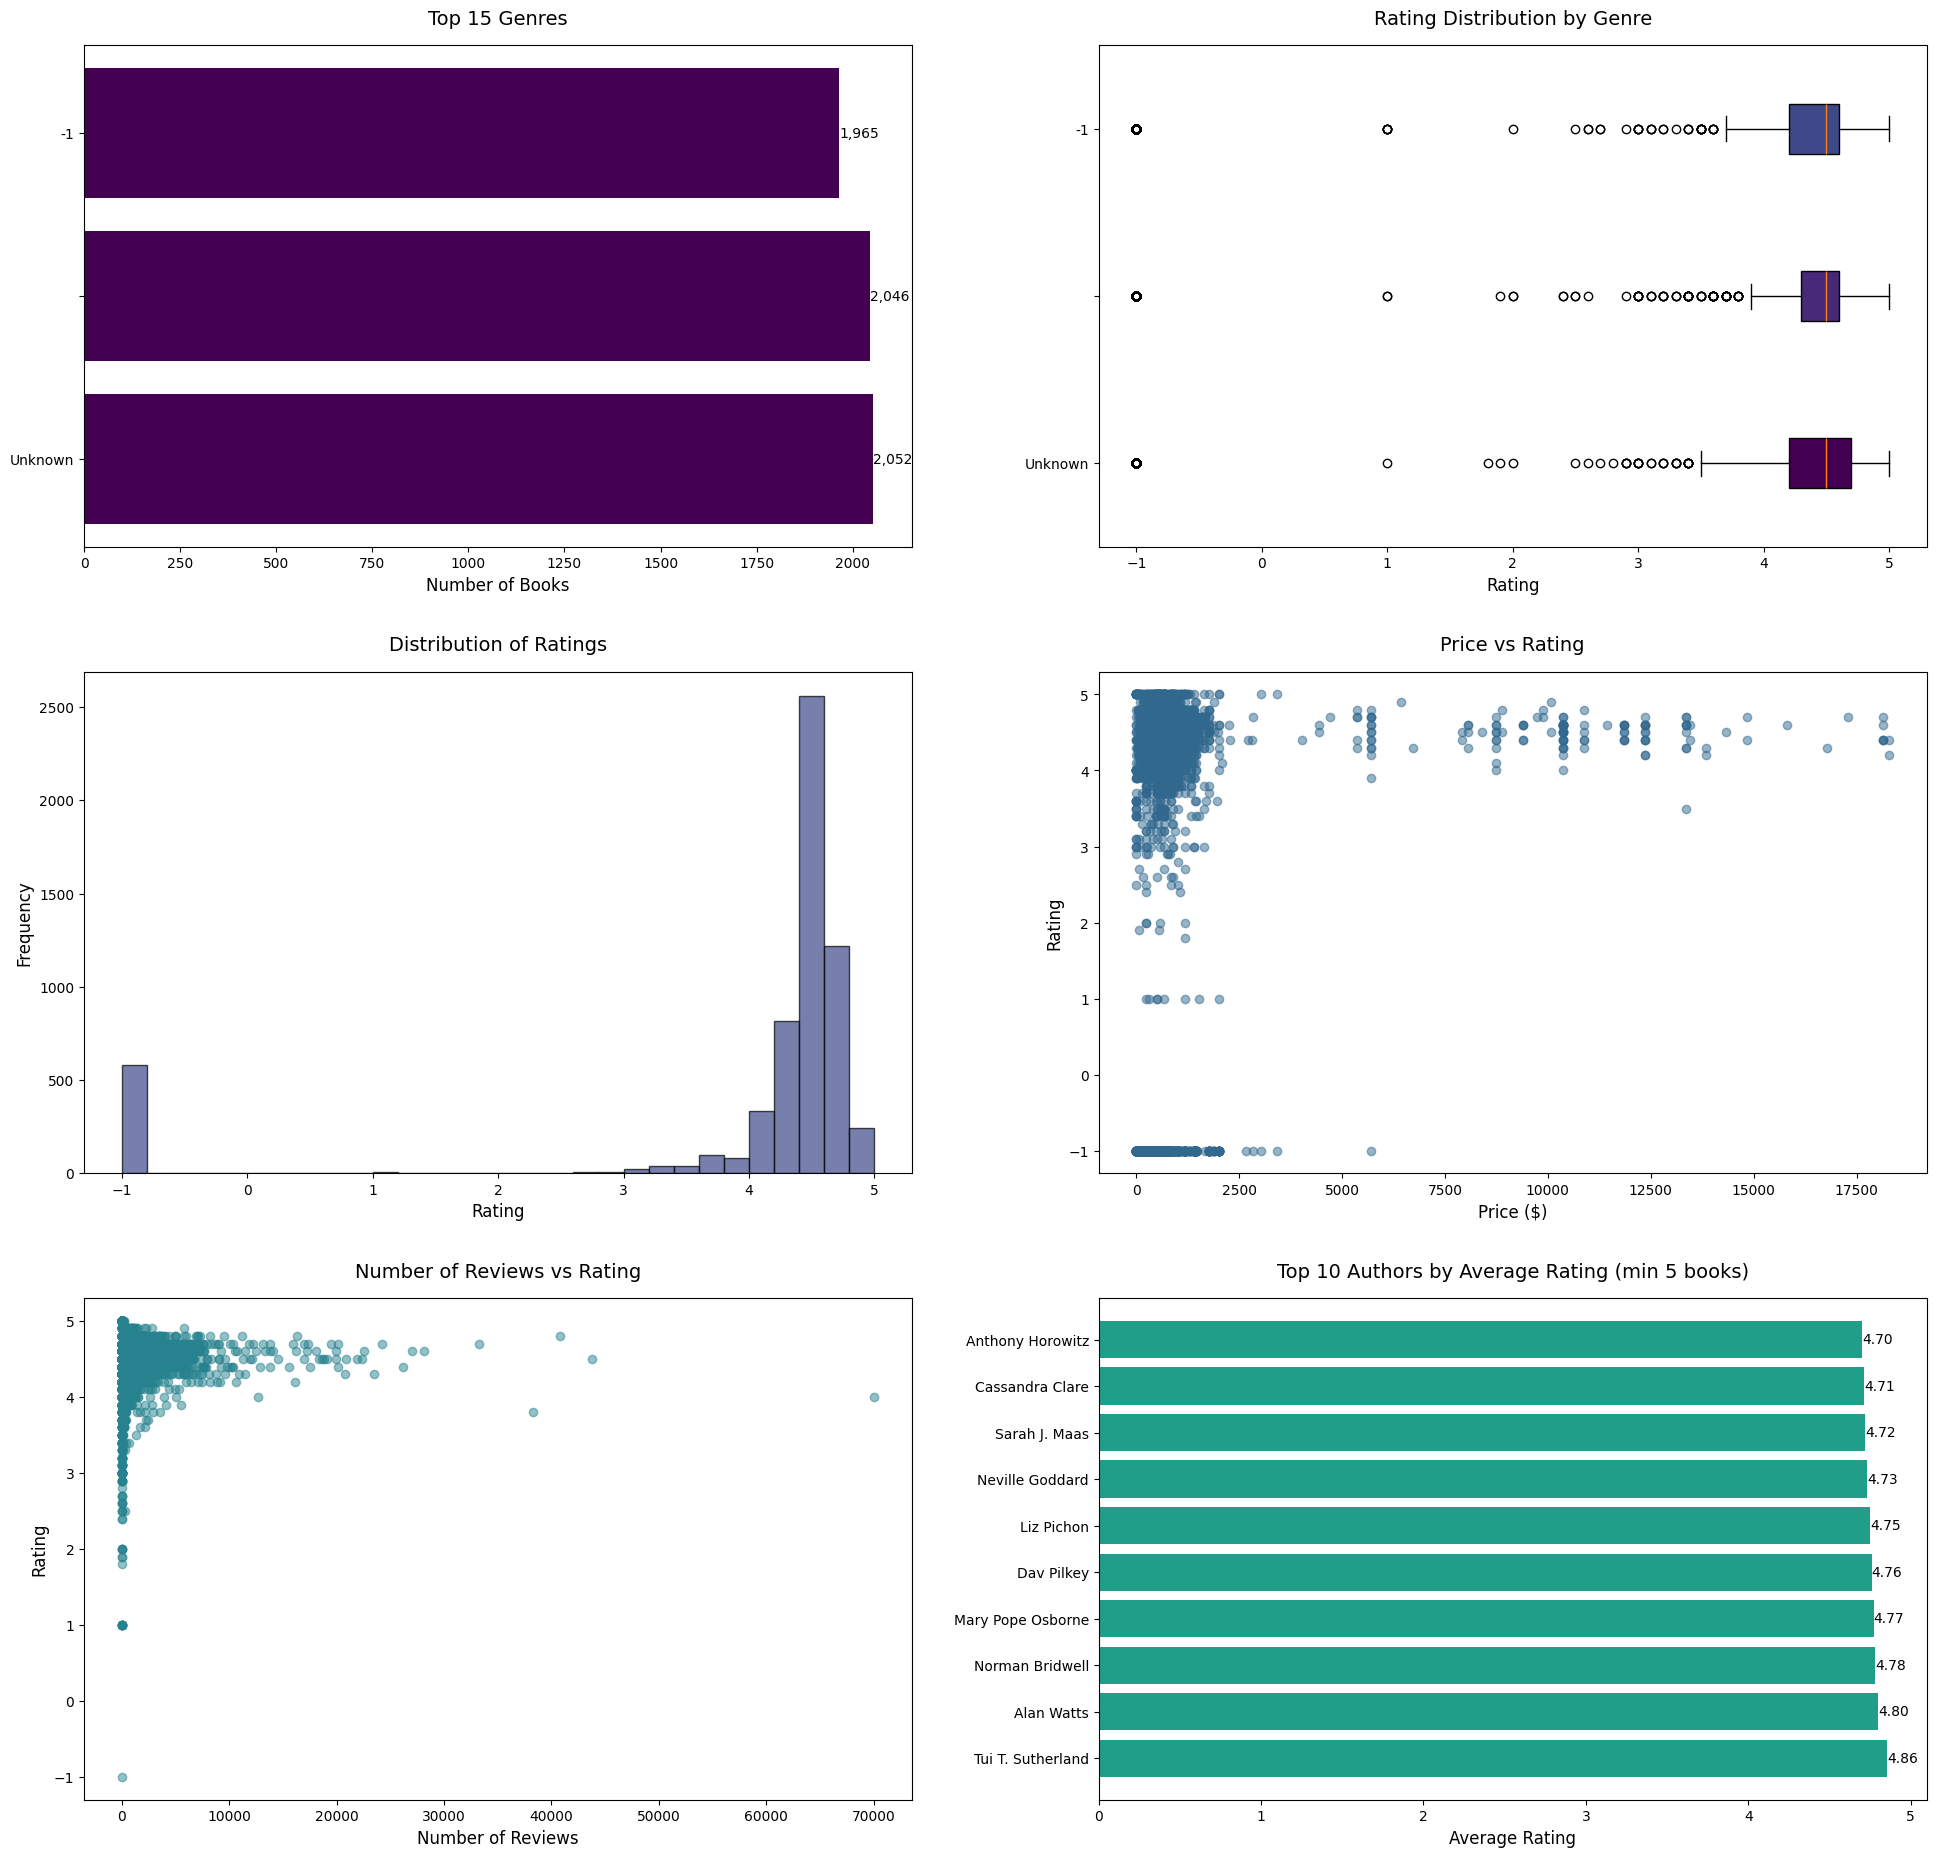

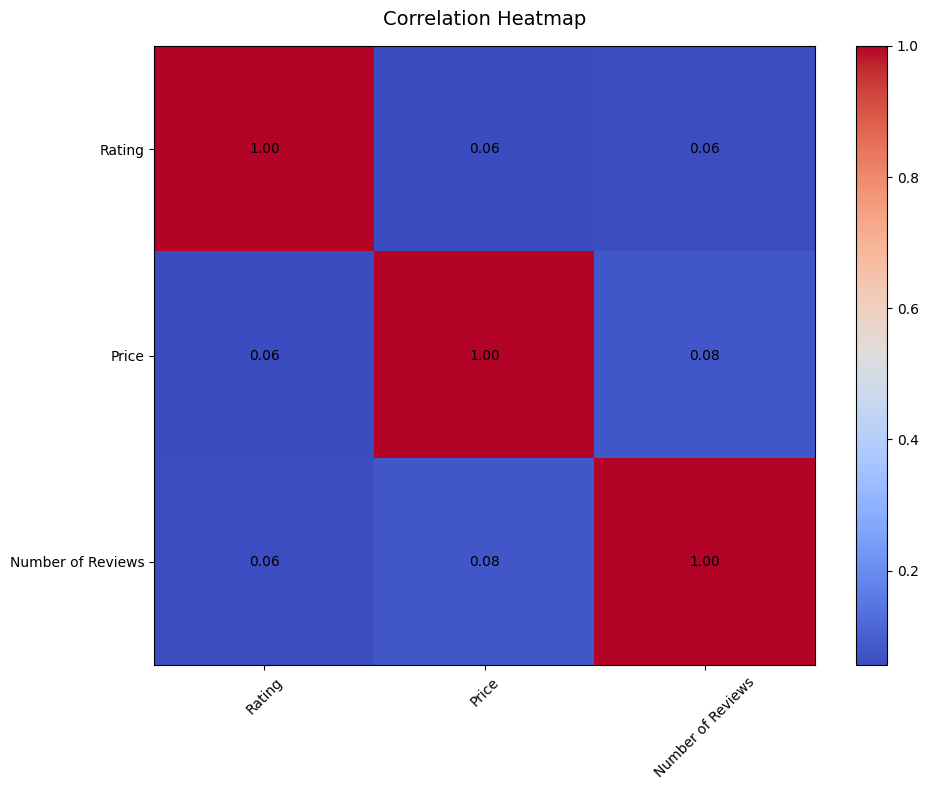


Detailed Statistical Analysis

Summary Statistics:
            Rating         Price  Number of Reviews
count  6063.000000   6062.000000        5482.000000
mean      3.933168    925.889970         925.826706
std       1.641670   1551.437253        2506.230107
min      -1.000000      0.000000           1.000000
25%       4.200000    501.000000          65.000000
50%       4.500000    683.000000         237.000000
75%       4.600000    888.000000         770.000000
max       5.000000  18290.000000       70077.000000

Correlation Matrix:
                   Rating  Price  Number of Reviews
Rating              1.000  0.056              0.060
Price               0.056  1.000              0.078
Number of Reviews   0.060  0.078              1.000

Genre Performance Analysis:
               Avg_Rating  Book_Count  Rating_Std  Avg_Price  Avg_Reviews
Primary Genre                                                            
Unknown              3.92        2052        1.66     860.10       642.10


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def perform_eda(df):
    plt.style.use('default')
    colors = plt.cm.viridis(np.linspace(0, 1, 10))
    fig = plt.figure(figsize=(20, 25))

    plt.subplot(4, 2, 1)
    genre_counts = df['Primary Genre'].value_counts().head(15)
    bars = plt.barh(genre_counts.index, genre_counts.values, color=colors[0])
    plt.title('Top 15 Genres', fontsize=14, pad=15)
    plt.xlabel('Number of Books', fontsize=12)
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width):,}', ha='left', va='center', fontsize=10)

    plt.subplot(4, 2, 2)
    top_genres = df['Primary Genre'].value_counts().head(10).index
    genre_data = df[df['Primary Genre'].isin(top_genres)]
    bp = plt.boxplot(
        [genre_data[genre_data['Primary Genre'] == genre]['Rating'] for genre in top_genres],
        labels=top_genres, vert=False, patch_artist=True
    )
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Rating Distribution by Genre', fontsize=14, pad=15)
    plt.xlabel('Rating', fontsize=12)

    plt.subplot(4, 2, 3)
    plt.hist(df['Rating'].dropna(), bins=30, color=colors[2], alpha=0.7, edgecolor='black')
    plt.title('Distribution of Ratings', fontsize=14, pad=15)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.subplot(4, 2, 4)
    plt.scatter(df['Price'], df['Rating'], alpha=0.5, color=colors[3])
    plt.title('Price vs Rating', fontsize=14, pad=15)
    plt.xlabel('Price ($)', fontsize=12)
    plt.ylabel('Rating', fontsize=12)

    plt.subplot(4, 2, 5)
    plt.scatter(df['Number of Reviews'], df['Rating'], alpha=0.5, color=colors[4])
    plt.title('Number of Reviews vs Rating', fontsize=14, pad=15)
    plt.xlabel('Number of Reviews', fontsize=12)
    plt.ylabel('Rating', fontsize=12)

    plt.subplot(4, 2, 6)
    author_stats = df.groupby('Author').agg({'Rating': ['mean', 'count']}).reset_index()
    author_stats.columns = ['Author', 'Avg_Rating', 'Book_Count']
    top_authors = author_stats[author_stats['Book_Count'] >= 5].nlargest(10, 'Avg_Rating')
    bars = plt.barh(top_authors['Author'], top_authors['Avg_Rating'], color=colors[5])
    plt.title('Top 10 Authors by Average Rating (min 5 books)', fontsize=14, pad=15)
    plt.xlabel('Average Rating', fontsize=12)
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=10)

    if 'Publication Year' in df.columns:
        plt.subplot(4, 2, 7)
        year_counts = df['Publication Year'].value_counts().sort_index()
        plt.plot(year_counts.index, year_counts.values, color=colors[6], linewidth=2, marker='o', markersize=4)
        plt.title('Publication Trends Over Time', fontsize=14, pad=15)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Books', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.subplot(4, 2, 8)
        year_ratings = df.groupby('Publication Year')['Rating'].mean()
        plt.plot(year_ratings.index, year_ratings.values, color=colors[7], linewidth=2, marker='o', markersize=4)
        plt.title('Average Rating by Publication Year', fontsize=14, pad=15)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average Rating', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(pad=3.0)

    plt.figure(figsize=(10, 8))
    correlation_matrix = df[['Rating', 'Price', 'Number of Reviews']].corr()
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            plt.text(i, j, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Heatmap', fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()

    print("\nDetailed Statistical Analysis")
    print("=" * 50)
    print("\nSummary Statistics:")
    print(df[['Rating', 'Price', 'Number of Reviews']].describe())
    print("\nCorrelation Matrix:")
    print(correlation_matrix.round(3))
    print("\nGenre Performance Analysis:")
    genre_analysis = df.groupby('Primary Genre').agg({'Rating': ['mean', 'count', 'std'], 'Price': 'mean', 'Number of Reviews': 'mean'}).round(2)
    genre_analysis.columns = ['Avg_Rating', 'Book_Count', 'Rating_Std', 'Avg_Price', 'Avg_Reviews']
    print(genre_analysis.nlargest(10, 'Book_Count'))
    print("\nTop Authors Analysis (min 5 books):")
    print(author_stats[author_stats['Book_Count'] >= 5].nlargest(10, 'Avg_Rating'))

def main():
    file1_path = r"C:\Users\bhask\Downloads\project_book\Audible_Catlog.csv"
    file2_path = r"C:\Users\bhask\Downloads\project_book\Audible_Catlog_Advanced_Features.csv"
    print("Starting data analysis pipeline...")
    print("\n1. Loading and merging datasets...")
    merged_df = load_and_merge_data(file1_path, file2_path)
    print("\n2. Cleaning and preprocessing data...")
    cleaned_df = clean_data(merged_df)
    cleaned_df.to_csv('processed_audible_data(1).csv', index=False)
    print("\nProcessed data saved to 'processed_audible_data.csv'")
    print("\n3. Performing exploratory data analysis...")
    perform_eda(cleaned_df)
    print("\nAnalysis complete!")
    return cleaned_df

if __name__ == "__main__":
    cleaned_data = main()


In [5]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Preprocessing text data...
Creating TF-IDF features...
Performing clustering...


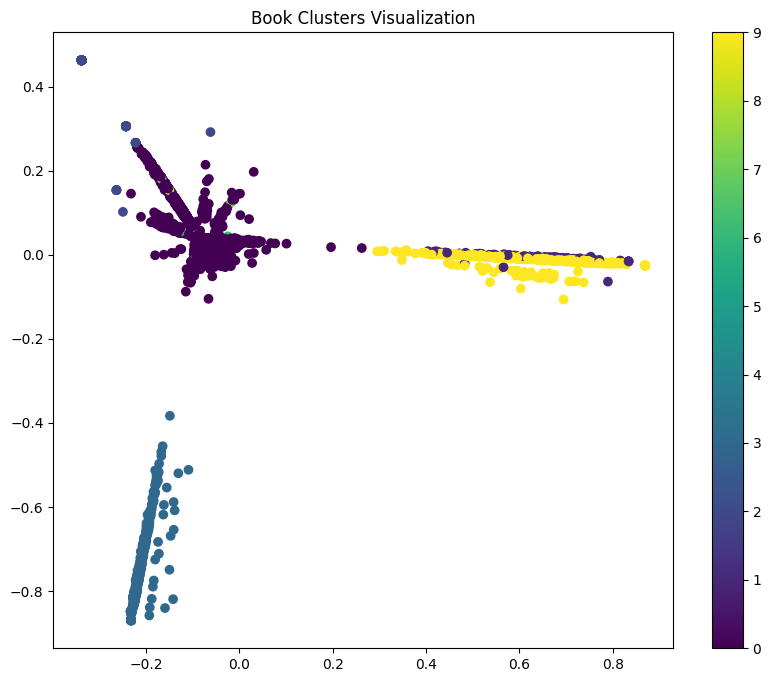

Saving model...
Model saved to book_recommender_model.pkl

Sample recommendations for '"Don't You Know Who I Am?": How to Stay Sane in an Era of Narcissism, Entitlement, and Incivility':
                                              Book Name          Author  \
2018                                          If I Stay    Gayle Forman   
3674                           Stay Hungry Stay Foolish   Rashmi Bansal   
3675           Staying Up, Up, Up in a Down, Down World      Zig Ziglar   
3393  Sandworm: A New Era of Cyberwar and the Hunt f...  Andy Greenberg   
3256                              Reasons to Stay Alive       Matt Haig   

      Rating Primary Genre                                        Description  
2018     4.3       Unknown                                                NaN  
3674     4.1           NaN  Rashesh Shah did it. Sanjeev Bikhchnadani did ...  
3675     4.2       Unknown                                                NaN  
3393     4.7       Unknown                

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

class BookRecommender:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.tfidf_vectorizer = None
        self.tfidf_matrix = None
        self.kmeans = None
        self.preprocessed_descriptions = None
        
    def preprocess_text(self, text):
        if pd.isna(text):
            return ""
        tokens = word_tokenize(str(text).lower())
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
        
        return " ".join(tokens)
    
    def prepare_features(self):
        print("Preprocessing text data...")
        self.df['processed_description'] = self.df['Description'].apply(self.preprocess_text)
        self.df['processed_name'] = self.df['Book Name'].apply(self.preprocess_text)
        
        self.preprocessed_descriptions = self.df['processed_description'] + " " + \
                                      self.df['processed_name'] + " " + \
                                      self.df['Primary Genre'].fillna("")
        print("Creating TF-IDF features...")
        self.tfidf_vectorizer = TfidfVectorizer(max_features=1000)
        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(self.preprocessed_descriptions)
        
        return self.tfidf_matrix
    
    def perform_clustering(self, n_clusters=10):
        print("Performing clustering...")
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.df['Cluster'] = self.kmeans.fit_predict(self.tfidf_matrix)
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(self.tfidf_matrix.toarray())
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], 
                            c=self.df['Cluster'], cmap='viridis')
        plt.title('Book Clusters Visualization')
        plt.colorbar(scatter)
        plt.show()
        
        return self.df['Cluster']
    
    def get_recommendations(self, book_name, n_recommendations=5):
        book_idx = self.df[self.df['Book Name'] == book_name].index[0]
        book_cluster = self.df.loc[book_idx, 'Cluster']
        similarity_scores = cosine_similarity(
            self.tfidf_matrix[book_idx:book_idx+1], 
            self.tfidf_matrix
        )
        cluster_mask = self.df['Cluster'] == book_cluster
        similarity_scores = similarity_scores.flatten() * cluster_mask
        
        # Get top similar books
        similar_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]
        
        recommendations = self.df.iloc[similar_indices][
            ['Book Name', 'Author', 'Rating', 'Primary Genre', 'Description']
        ]
        
        return recommendations
    
    def save_model(self, path='book_recommender_model.pkl'):
        print("Saving model...")
        model_data = {
            'tfidf_vectorizer': self.tfidf_vectorizer,
            'tfidf_matrix': self.tfidf_matrix,
            'kmeans': self.kmeans,
            'df': self.df
        }
        with open(path, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"Model saved to {path}")

def main():
    recommender = BookRecommender('processed_audible_data.csv')
    recommender.prepare_features()
    recommender.perform_clustering()
    
    # Save the model for later use in Streamlit
    recommender.save_model()
    sample_book = recommender.df['Book Name'].iloc[0]
    print(f"\nSample recommendations for '{sample_book}':")
    recommendations = recommender.get_recommendations(sample_book)
    print(recommendations)

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

class BookRecommenderSystem:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.models = {}
        self.preprocessed_descriptions = None
        self.feature_matrices = {}
        self.evaluation_results = {}
        
    def preprocess_text(self, text):
        if pd.isna(text):
            return ""
        
        tokens = word_tokenize(str(text).lower())
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
        
        return " ".join(tokens)
    
    def prepare_features(self):
        print("Preprocessing text data...")
        self.df['processed_description'] = self.df['Description'].apply(self.preprocess_text)
        self.df['processed_name'] = self.df['Book Name'].apply(self.preprocess_text)
        
        self.preprocessed_descriptions = self.df['processed_description'] + " " + \
                                      self.df['processed_name'] + " " + \
                                      self.df['Primary Genre'].fillna("")
        print("Creating feature matrices...")
        tfidf_vectorizer = TfidfVectorizer(max_features=1000)
        self.feature_matrices['tfidf'] = tfidf_vectorizer.fit_transform(self.preprocessed_descriptions)
        count_vectorizer = CountVectorizer(max_features=1000)
        self.feature_matrices['count'] = count_vectorizer.fit_transform(self.preprocessed_descriptions)
        svd = TruncatedSVD(n_components=100)
        self.feature_matrices['lsa'] = svd.fit_transform(self.feature_matrices['tfidf'])
        genre_dummies = pd.get_dummies(self.df['Primary Genre'])
        self.feature_matrices['genre'] = genre_dummies.values
        
    def train_models(self):
        print("Training multiple recommendation models...")
        
        # Model 1: K-means with TF-IDF
        kmeans_tfidf = KMeans(n_clusters=10, random_state=42)
        self.models['kmeans_tfidf'] = {
            'model': kmeans_tfidf,
            'features': self.feature_matrices['tfidf'],
            'clusters': kmeans_tfidf.fit_predict(self.feature_matrices['tfidf'])
        }
        
        # Model 2: DBSCAN with LSA
        dbscan_lsa = DBSCAN(eps=0.5, min_samples=5)
        self.models['dbscan_lsa'] = {
            'model': dbscan_lsa,
            'features': self.feature_matrices['lsa'],
            'clusters': dbscan_lsa.fit_predict(self.feature_matrices['lsa'])
        }
        
        # Model 3: K-means with Count Vectorizer
        kmeans_count = KMeans(n_clusters=10, random_state=42)
        self.models['kmeans_count'] = {
            'model': kmeans_count,
            'features': self.feature_matrices['count'],
            'clusters': kmeans_count.fit_predict(self.feature_matrices['count'])
        }
        
        # Model 4: Hybrid (K-means with combined features)
        combined_features = np.hstack([
            self.feature_matrices['lsa'],
            StandardScaler().fit_transform(self.feature_matrices['genre'])
        ])
        kmeans_hybrid = KMeans(n_clusters=10, random_state=42)
        self.models['kmeans_hybrid'] = {
            'model': kmeans_hybrid,
            'features': combined_features,
            'clusters': kmeans_hybrid.fit_predict(combined_features)
        }
    
    def evaluate_models(self):
        print("Evaluating models...")
        train_indices, test_indices = train_test_split(
            range(len(self.df)), test_size=0.2, random_state=42
        )
        
        for model_name, model_data in self.models.items():
            similarity_matrix = cosine_similarity(model_data['features'])
            precisions = []
            recalls = []
            rmse_scores = []
            
            for idx in test_indices:
                actual_cluster = model_data['clusters'][idx]
                
                # Get predicted recommendations
                sim_scores = similarity_matrix[idx]
                similar_indices = sim_scores.argsort()[::-1][1:6]  # top 5 recommendations
                predicted_clusters = model_data['clusters'][similar_indices]
                precision = precision_score(
                    [actual_cluster] * len(predicted_clusters),
                    predicted_clusters,
                    average='weighted',
                    zero_division=0
                )
                recall = recall_score(
                    [actual_cluster] * len(predicted_clusters),
                    predicted_clusters,
                    average='weighted',
                    zero_division=0
                )
                rmse = np.sqrt(mean_squared_error(
                    [sim_scores[idx]] * len(similar_indices),
                    sim_scores[similar_indices]
                ))
                
                precisions.append(precision)
                recalls.append(recall)
                rmse_scores.append(rmse)
            self.evaluation_results[model_name] = {
                'precision': np.mean(precisions),
                'recall': np.mean(recalls),
                'rmse': np.mean(rmse_scores)
            }
    
    def print_evaluation_results(self):
        print("\nModel Evaluation Results:")
        print("-" * 50)
        
        # Calculate overall accuracy score
        accuracy_scores = {}
        
        for model_name, metrics in self.evaluation_results.items():
            accuracy = (metrics['precision'] + metrics['recall']) / 2 * (1 - metrics['rmse'])
            accuracy_scores[model_name] = accuracy
            
            print(f"\nModel: {model_name}")
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"RMSE: {metrics['rmse']:.4f}")
            print(f"Overall Accuracy: {accuracy:.4f}")
        
        # Find best model
        best_model = max(accuracy_scores.items(), key=lambda x: x[1])
        print("\n" + "=" * 50)
        print(f"Best Model: {best_model[0]}")
        print(f"Best Accuracy: {best_model[1]:.4f}")
    
    def save_models(self, base_path='book_recommender_models'):
        print("\nSaving models...")
        for model_name, model_data in self.models.items():
            path = f'{base_path}_{model_name}.pkl'
            with open(path, 'wb') as f:
                pickle.dump({
                    'model': model_data['model'],
                    'features': model_data['features'],
                    'clusters': model_data['clusters'],
                    'evaluation': self.evaluation_results[model_name]
                }, f)
            print(f"Saved {model_name} to {path}")

def main():
    recommender = BookRecommenderSystem(r'D:\bhachu\Book_Recommendations\processed_audible_data(1).csv')
    recommender.prepare_features()
    recommender.train_models()
    recommender.evaluate_models()
    recommender.print_evaluation_results()
    recommender.save_models()

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Preprocessing text data...
Creating feature matrices...
Training multiple recommendation models...
Evaluating models...

Model Evaluation Results:
--------------------------------------------------

Model: kmeans_tfidf
Precision: 0.9052
Recall: 0.6587
RMSE: 0.4071
Overall Accuracy: 0.4636

Model: dbscan_lsa
Precision: 0.9505
Recall: 0.8815
RMSE: 0.1984
Overall Accuracy: 0.7342

Model: kmeans_count
Precision: 0.9909
Recall: 0.8580
RMSE: 0.3609
Overall Accuracy: 0.5909

Model: kmeans_hybrid
Precision: 0.9942
Recall: 0.9443
RMSE: 0.0387
Overall Accuracy: 0.9317

Best Model: kmeans_hybrid
Best Accuracy: 0.9317

Saving models...
Saved kmeans_tfidf to book_recommender_models_kmeans_tfidf.pkl
Saved dbscan_lsa to book_recommender_models_dbscan_lsa.pkl
Saved kmeans_count to book_recommender_models_kmeans_count.pkl
Saved kmeans_hybrid to book_recommender_models_kmeans_hybrid.pkl


In [ ]:
import pandas as pd 
file_path = r"D:\bhachu\Book_Recommendations\processed_audible_data(1).csv" 
df = pd.read_csv(file_path)
df

,Book Name,Author,Description,Listening Time,Ranks and Genre,Rating,Number of Reviews,Price,Primary Genre,All Genres
0,"""Don'T You Know Who I Am?"": How To Stay Sane I...",Ramani S. Durvasula Phd,NaN,NaN,NaN,4.8,170.0,836.0,Unknown,[]
1,#Girlboss,Sophia Amoruso,"Sorry, we just need to make sure you're not a ...",-1,-1,4.5,2260.0,615.0,-1,['-1']
2,#Therealcinderella: #Bestfriendsforever Series...,Yesenia Vargas,\n\nOops!\nIt's rush hour and traffic is pilin...,-1,-1,4.3,179.0,586.0,-1,['-1']
3,10 Bedtime Stories For Little Kids,Div.,\nBy completing your purchase you agree to Aud...,-1,-1,-1.0,NaN,376.0,-1,['-1']
4,10 Essential Pieces Of Literature,Khalil Gibran,This Audiobook contains the following works:,87 hours and 44 minutes,",#759 in Audible Audiobooks & Originals (See T...",-1.0,NaN,32.0,NaN,"['', '#759 in Audible Audiobooks & Originals (..."
...,...,...,...,...,...,...,...,...,...,...
6058,टिंडर टैक्सी - एक कामुक लघुकथा,ली लिंड,"Sorry, we just need to make sure you're not a ...",-1,-1,-1.0,NaN,65.0,-1,['-1']
6059,द गेम विद मिस्टर एक्‍स - एक कामुक लघुकथा,ओलरिक,"Sorry, we just need to make sure you're not a ...",-1,-1,-1.0,NaN,32.0,-1,['-1']
6060,द निम्फ़ एंड द फ़ॉन्स - एक कामुक लघुकथा,ओलरिक,"""पांच मर्द फ़र वाले पैजामे में उछल रहे थे और उन...",37 minutes,",#2,487 in Audible Audiobooks & Originals (See...",-1.0,NaN,32.0,NaN,"['', '#2', '487 in Audible Audiobooks & Origin..."
6061,माय एबडक्शन फ़ैन्टसी - एक कामुक लघुकथा,राइनर लार्सन वीस,NaN,NaN,NaN,-1.0,NaN,65.0,Unknown,[]


In [7]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import plotly.express as px
file_path = r"D:\bhachu\Book_Recommendations\processed_audible_data(1).csv" 
df = pd.read_csv(file_path)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['All Genres', 'Author', 'Rating'], inplace=True)

# 1. Popular genres in the dataset
genre_counts = df['All Genres'].value_counts().reset_index()
genre_counts.columns = ['All Genres', 'Count']
fig_genre = px.bar(genre_counts, x='All Genres', y='Count', title='Top Genres in the Dataset')
fig_genre.show()

# 2. Highest-rated authors
highest_rated_authors = df.groupby('Author')['Rating'].mean().reset_index().sort_values('Rating', ascending=False)
fig_authors = px.bar(highest_rated_authors.head(10), x='Author', y='Rating', title='Top 10 Highest-Rated Authors')
fig_authors.show()

# 3. Average rating distribution
fig_ratings = px.histogram(df, x='Rating', nbins=20, title='Average Rating Distribution Across Books')
fig_ratings.show()




In [ ]:
import pandas as pd
import plotly.express as px
file_path = r"D:\bhachu\Book_Recommendations\processed_audible_data(1).csv"  # Replace with your dataset path
df = pd.read_csv(file_path)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')  # Ensure this column exists
df.dropna(subset=['All Genres', 'Author', 'Rating', 'Number of Reviews'], inplace=True)

# Categorize books by review count ranges
bins = [0, 50, 200, 500, 1000, df['Number of Reviews'].max()]
labels = ['0-50', '51-200', '201-500', '501-1000', '1000+']
df['Review Count Category'] = pd.cut(df['Number of Reviews'], bins=bins, labels=labels)

# Aggregate average rating by review count category
rating_by_review_count = df.groupby('Review Count Category')['Rating'].mean().reset_index()

# Plot the relationship between review count categories and average ratings
fig_review_ratings = px.bar(rating_by_review_count, x='Review Count Category', y='Rating', 
                             title='Ratings by Review Count Categories',
                             labels={'Review Count Category': 'Review Count Range', 'Rating': 'Average Rating'})
fig_review_ratings.show()


C:\Users\bhask\AppData\Local\Temp\ipykernel_3020\3248391837.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
df.dropna(subset=['Description'], inplace=True)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Description'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# View books in the same cluster
for cluster_num in df['Cluster'].unique():
    print(f"\nCluster {cluster_num}:")
    print(df[df['Cluster'] == cluster_num][['Book Name', 'Description']].head())



Cluster 1:
                                            Book Name  \
1                                           #Girlboss   
20                                101 Animals Stories   
23      101 Essays That Will Change The Way You Think   
50  21 Great Ways To Get Paid More And Promoted Fa...   
52  21-Day Challenges Box Set 1 - Self Love, Self ...   

                                          Description  
1   Sorry, we just need to make sure you're not a ...  
20  Sorry, we just need to make sure you're not a ...  
23  Sorry, we just need to make sure you're not a ...  
50  Sorry, we just need to make sure you're not a ...  
52  Sorry, we just need to make sure you're not a ...  

Cluster 3:
                                            Book Name  \
2   #Therealcinderella: #Bestfriendsforever Series...   
32  12 Months To $1 Million: How To Pick A Winning...   
42  1962: The War That Wasn'T: The Definitive Acco...   
45                                               1Q84   
49          

In [6]:
# Group by genre and calculate average ratings
genre_similarity = df.groupby('All Genres')['Rating'].mean().reset_index().sort_values('Rating', ascending=False)

# Plot the relationship between genres and average ratings
fig_genre_ratings = px.bar(genre_similarity, x='All Genres', y='Rating', 
                            title='Average Ratings by Genre', 
                            labels={'All Genres': 'Genre', 'Rating': 'Average Rating'})
fig_genre_ratings.show()


In [ ]:
# Calculate author popularity and average ratings
author_popularity = df.groupby('Author').agg({'Book Name': 'count', 'Rating': 'mean'}).reset_index()
author_popularity.columns = ['Author', 'Book Count', 'Average Rating']
fig_author_popularity = px.scatter(author_popularity, x='Book Count', y='Average Rating', 
                                    title='Effect of Author Popularity on Book Ratings',
                                    labels={'Book Count': 'Number of Books', 'Average Rating': 'Rating'})
fig_author_popularity.show()


In [9]:
print(df.columns)


Index(['Book Name', 'Author', 'Description', 'Listening Time',
       'Ranks and Genre', 'Rating', 'Number of Reviews', 'Price',
       'Primary Genre', 'All Genres', 'Review Count Category', 'Cluster',
       'Combined Features'],
      dtype='object')


In [14]:
# Filter books from the 'Science Fiction' genre
sci_fi_books = df[df['All Genres'].str.contains('Science Fiction', case=False, na=False)]

# Get top 5 books based on rating
top_sci_fi_books = sci_fi_books.sort_values(by='Rating', ascending=False).head(5)
print("Top 5 Science Fiction Book Recommendations:")
print(top_sci_fi_books[['Book Name', 'Rating']])


Top 5 Science Fiction Book Recommendations:
                                              Book Name  Rating
2718   Morning Star: Book Iii Of The Red Rising Trilogy     4.8
1172  Doctor Who: 10Th Doctor Tales: 10Th Doctor Aud...     4.8
3586  So Long, Lollipops: The Free Until The End Of ...     4.8
1558                Gemina: The Illuminae Files, Book 2     4.7
3071                   Percy Jackson And The Greek Gods     4.7


In [15]:
# Filter books from the 'Thriller' genre
thriller_books = df[df['All Genres'].str.contains('Thriller', case=False, na=False)]

# Sort by rating to get top recommendations
top_thriller_books = thriller_books.sort_values(by='Rating', ascending=False).head(5)
print("Top 5 Thriller Recommendations:")
print(top_thriller_books[['Book Name', 'Rating']])


Top 5 Thriller Recommendations:
                                       Book Name  Rating
3505  Sherlock Holmes: The Definitive Collection     5.0
639         Blasphemy: The Trial Of Danesh Masih     4.9
4552                The Harbinger Ii: The Return     4.8
5615                Thunderhead: Arc Of A Scythe     4.8
2850                                  Nightshade     4.8


In [16]:
# Define low popularity as books with fewer than 50 reviews
hidden_gems = df[(df['Rating'] > 4.5) & (df['Number of Reviews'] < 50)]

# Sort by rating and display top 5 hidden gems
top_hidden_gems = hidden_gems.sort_values(by='Rating', ascending=False).head(5)
print("Top 5 Hidden Gems:")
print(top_hidden_gems[['Book Name', 'Rating', 'Number of Reviews']])


Top 5 Hidden Gems:
                                              Book Name  Rating  \
2787  Mysteries Of The Universe: Answerable And Unan...     5.0   
4411  The First Time He Hit Her: The Murder Of Tara ...     5.0   
2398  Life Changing Secrets From The 3 Masters Of Su...     5.0   
2359  Learn Thai With Innovative Language'S Proven L...     5.0   
2355  Learn Spanish With Innovative Language'S Prove...     5.0   

      Number of Reviews  
2787                3.0  
4411                2.0  
2398                2.0  
2359                1.0  
2355                1.0  
